In [451]:
%matplotlib widget

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
            
import datetime
             
from scipy.integrate import cumtrapz
# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 

In [452]:
# Reload PandemiXModelFunctions, in case changes have been made
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

# Get data

In [453]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [454]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv',delimiter=';',encoding='latin1')
df['Prøvetagningsdato'] =  pd.to_datetime(df['Prøvetagningsdato'],format='%Y-%m-%d')

df = df.groupby(['Prøvetagningsdato']).sum()

df = df.iloc[:-1]
df.tail()

,Bekræftede tilfælde i alt,Døde,Indlæggelser,Kummuleret antal døde,Kummuleret antal bekræftede tilfælde,Kummuleret antal indlæggelser
Prøvetagningsdato,,,,,,
2022-03-02,17337,5,207,48513,28054042,426481
2022-03-03,15764,8,229,48603,28217096,428577
2022-03-04,13382,5,215,48656,28361174,430771
2022-03-05,10926,1,142,48684,28481284,432410
2022-03-06,10094,1,104,48691,28584800,433772


In [455]:
dfTest = pd.read_csv(latestdir+'/Regionalt_DB/16_pcr_og_antigen_test_pr_region.csv',delimiter=';',encoding='latin1')

# dfPCR = dfTest.groupby(['Medt']).sum()
dfPCR = dfTest[dfTest.Metode=='PCR']
dfAntigen = dfTest[dfTest.Metode=='Antigen']

dfPCR = dfPCR.groupby('Uge').sum()
dfAntigen = dfAntigen.groupby('Uge').sum()


dfPCR['Date'] = [np.datetime64(datetime.datetime.strptime(x + '-1', "%Y-W%W-%w")) for x in dfPCR.index]
dfAntigen['Date'] = [np.datetime64(datetime.datetime.strptime(x + '-1', "%Y-W%W-%w")) for x in dfAntigen.index]

dfPCR.tail()

,Prøver,Date
Uge,,
2022-W05,1124750,2022-01-31
2022-W06,1058368,2022-02-07
2022-W07,794119,2022-02-14
2022-W08,564656,2022-02-21
2022-W09,417838,2022-02-28


In [456]:
# Get number of people currently in hospitals
latestsubdirs_dash = list(os.walk(path_dash))[0][1]
# latestsubdirs_dash == 'SSI_dashboard_2021-12-17'
lastFullFileIndex = np.where([x == 'SSI_dashboard_2021-12-17' for x in latestsubdirs_dash])[0][0]
latestdir_dash = path_dash + latestsubdirs_dash[lastFullFileIndex]

dfKey = pd.read_csv(latestdir_dash+'\\Kommunalt_DB\\01_noegletal.csv',encoding='latin1',delimiter=';')
dfKey['IndberetningDato'] = pd.to_datetime(dfKey['IndberetningDato'])
admDays = dfKey.IndberetningDato.values
admCount = dfKey['Antal indlagte i dag med COVID'].values

(0.0, 3234845.2)

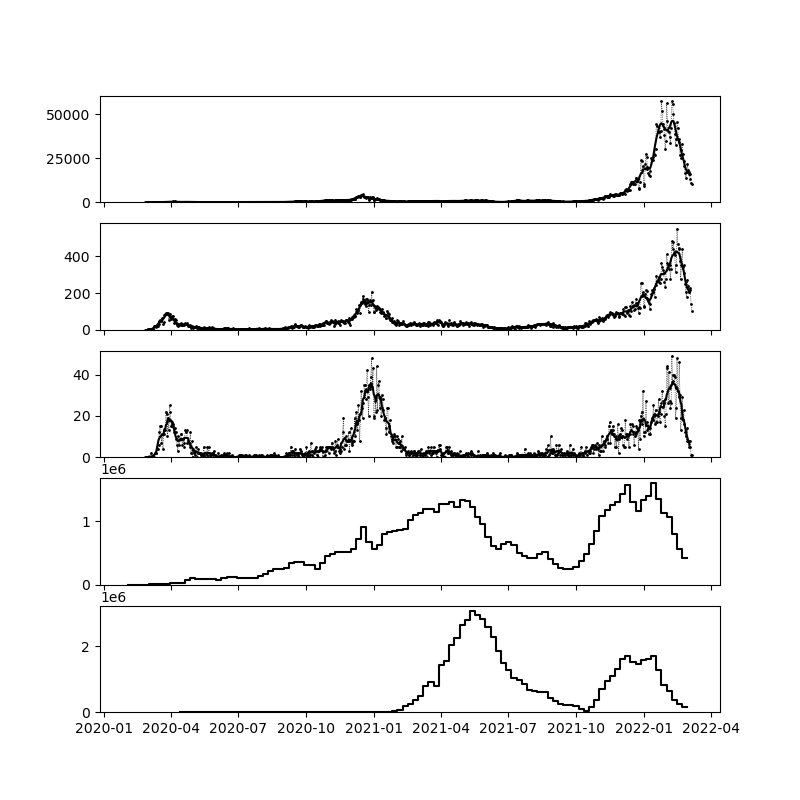

In [457]:
# Plot everything, just to check 
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize=(8,8))

# ax1.plot(df.index,df['Bekræftede tilfælde i alt'])
# ax3.plot(df.index,df['Indlæggelser'])
# ax2.plot(df.index,df['Døde'])

pf.plotMean(df.index,df['Bekræftede tilfælde i alt'],ax1,color='k')
pf.plotMean(df.index,df['Indlæggelser'],ax2,color='k')
pf.plotMean(df.index,df['Døde'],ax3,color='k')

ax4.step(dfPCR.Date,dfPCR['Prøver'],where='pre',color='k')
ax5.step(dfAntigen.Date,dfAntigen['Prøver'],where='pre',color='k')

# pf.plotMean(dfPCR.Date,dfPCR['Prøver'],ax4,color='k')
# pf.plotMean(dfAntigen.Date,dfAntigen['Prøver'],ax5,color='k')

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)
ax4.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

In [458]:
dates = df.index 
cases = df['Bekræftede tilfælde i alt']
adms = df['Indlæggelser']
deaths = df['Døde']

# Initial lock-down

(0.0, 26.25)

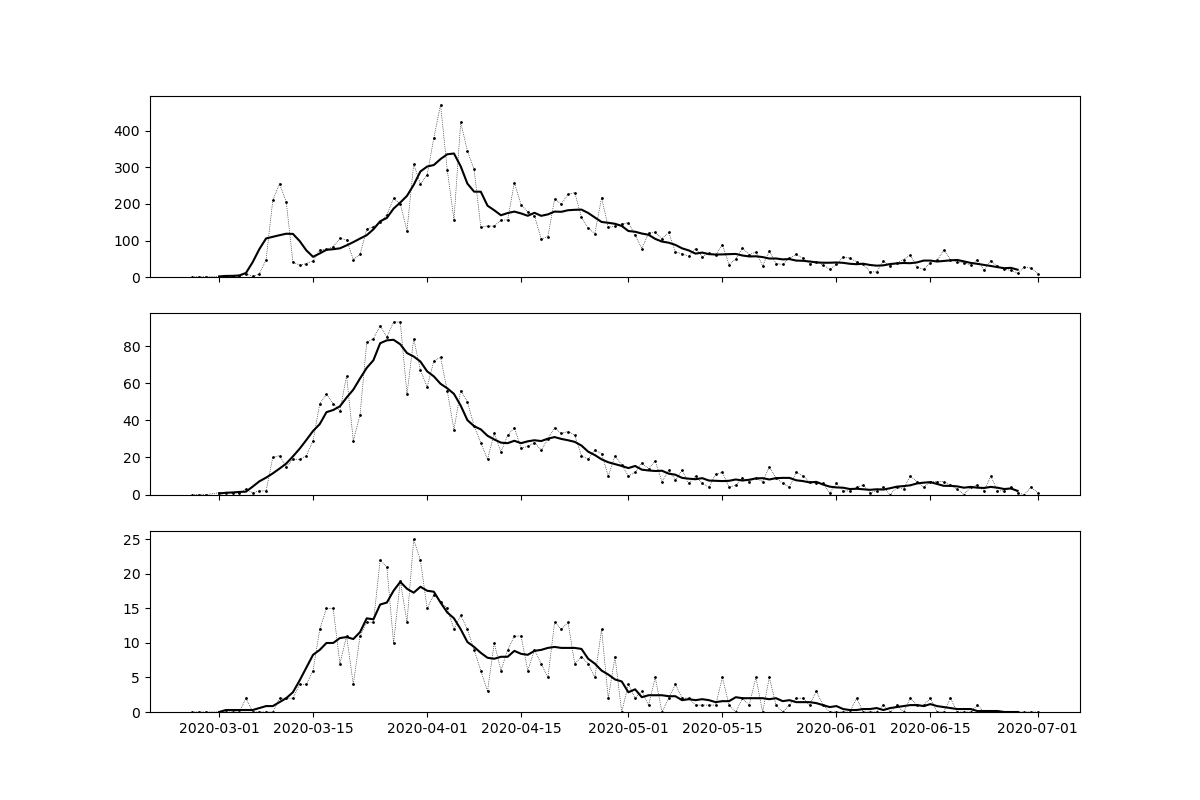

In [459]:
# Plot period
lastDate = np.datetime64('2020-07-01')
curCas = cases[dates <= lastDate]
curAdm = adms[dates <= lastDate]
curDea = deaths[dates <= lastDate]
curDates = dates[dates <= lastDate]

curAdmBelDays = admDays[admDays <= lastDate]
curAdmBel = admCount[admDays <= lastDate]


fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)


pf.plotMean(curDates,curCas,ax1,color='k')
pf.plotMean(curDates,curAdm,ax2,color='k')
# pf.plotMean(curAdmBelDays,curAdmBel/7,ax2,color='b')
pf.plotMean(curDates,curDea,ax3,color='k')

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)

In [460]:
modelMeta = ({
     'beta * S * I' : ['S','I' ],
     'nu * I' : ['I',None],
},
['S','I'],['beta','nu'])

modelMeta_SEIR = ({
     'beta * S * I' : ['S','E'],
     'gamma * E' : ['E','I'],
     'nu * I' : ['I',None],
},
['S','E','I'],['beta','gamma','nu'])

modelMeta_SEEIR = ({
     'beta * S * I' : ['S','E1'],
     '0.5 * gamma * E1' : ['E1','E2'],
     '0.5 * gamma * E2' : ['E2','I'],
     'nu * I' : ['I',None],
},
['S','E1','E2','I'],['beta','gamma','nu'])


In [461]:
# Reload PandemiXModelFunctions, in case changes have been made
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

In [462]:
# # Initialize everything

# DKpop = 5800000
# iniInf = 10

# I_0 = iniInf/DKpop 
# S_0 = 1 - I_0

# init = {'S' : S_0,'I':I_0}

# gamma = 1/4.7
# beta = 2.5*gamma 
# pars = {'beta':beta,'gamma':gamma}

# tEnd = 150
# sch1 = pmf.Scheme(modelMeta,init,pars,0,tEnd,Changes=[])
# sch1.simulate(tRes=10000)

In [463]:
# # Initialize everything

# DKpop = 5800000
# iniExp = 1
# iniInf = 0

# I_0 = iniInf/DKpop 
# E_0 = iniExp/DKpop 
# S_0 = 1 - I_0 - E_0

# init = {'S' : S_0,'E':E_0 , 'I':I_0}
# print(init)
# gamma = 1/2
# nu = 1/4
# beta = 3*gamma 
# pars = {'beta':beta,'nu':nu,'gamma':gamma}

# tEnd = 4
# sch1 = pmf.Scheme(modelMeta_SEIR,init,pars,0,tEnd,Changes=[])
# sch1.simulate()

# fig,ax1 = plt.subplots()
# ax1.plot(sch1.result.t,DKpop*sch1.result.E)
# ax1.plot(sch1.result.t,DKpop*sch1.result.I)
# # ax1.plot(sch1.result.t,DKpop*sch1.result.S)


In [464]:
# # Initialize everything

# DKpop = 5800000
# iniExp = 5
# iniInf = 0

# I_0 = iniInf/DKpop 
# E_0 = iniExp/DKpop 
# S_0 = 1 - I_0 - E_0

# init = {'S' : S_0,'E':E_0 , 'I':I_0}

# gamma = 1/5
# nu = 1/2
# beta = 3.5*nu 
# pars = {'beta':beta,'nu':nu,'gamma':gamma}

# tEnd = 150
# sch1 = pmf.Scheme(modelMeta_SEIR,init,pars,0,tEnd,Changes=[])
# sch1.simulate(tRes=10000)

# dayOffset = -10
# mDays = curDates[0] +np.arange(np.timedelta64(0,'D'),np.timedelta64(tEnd,'D')) + np.timedelta64(dayOffset,'D')
# tRange = np.arange(0,tEnd)
# mInf = np.interp(tRange,sch1.result.t, sch1.result.I)


# tChange = np.where(mDays  == np.datetime64('2020-03-11'))[0][0]
# changeLockdown = pmf.Change(tChange,SetParameters={'beta':0.7*nu})

# sch1.addChange(changeLockdown)
# # print(sch1)

In [496]:
# Initialize everything

DKpop = 5800000
iniExp = 10
iniInf = 0

I_0 = iniInf/DKpop 
E1_0 = iniExp/DKpop 
E2_0 = 0
S_0 = 1 - I_0 - E1_0 - E2_0 

init = {'S' : S_0,'E1':E1_0,'E2':E2_0 , 'I':I_0}

gamma = 1/2.5
nu = 1/3.5
beta = 3.5*nu 
pars = {'beta':beta,'nu':nu,'gamma':gamma}

tEnd = 150
sch1 = pmf.Scheme(modelMeta_SEEIR,init,pars,0,tEnd,Changes=[])
sch1.simulate(tRes=10000)

dayOffset = -40
mDays = curDates[0] +np.arange(np.timedelta64(0,'D'),np.timedelta64(tEnd,'D')) + np.timedelta64(dayOffset,'D')
tRange = np.arange(0,tEnd)
mInf = np.interp(tRange,sch1.result.t, sch1.result.I)


tChange = np.where(mDays  == np.datetime64('2020-03-11'))[0][0]
changeLockdown = pmf.Change(tChange,SetParameters={'beta':0.7*nu})

sch1.addChange(changeLockdown)
# print(sch1)

In [497]:
sch1.simulate(tRes=10000)

mInf = np.interp(tRange,sch1.result.t, sch1.result.I)
mExp1 = np.interp(tRange,sch1.result.t, sch1.result.E1)
mExp2 = np.interp(tRange,sch1.result.t, sch1.result.E2)
# mExp = np.interp(tRange,sch1.result.t, sch1.result.E)

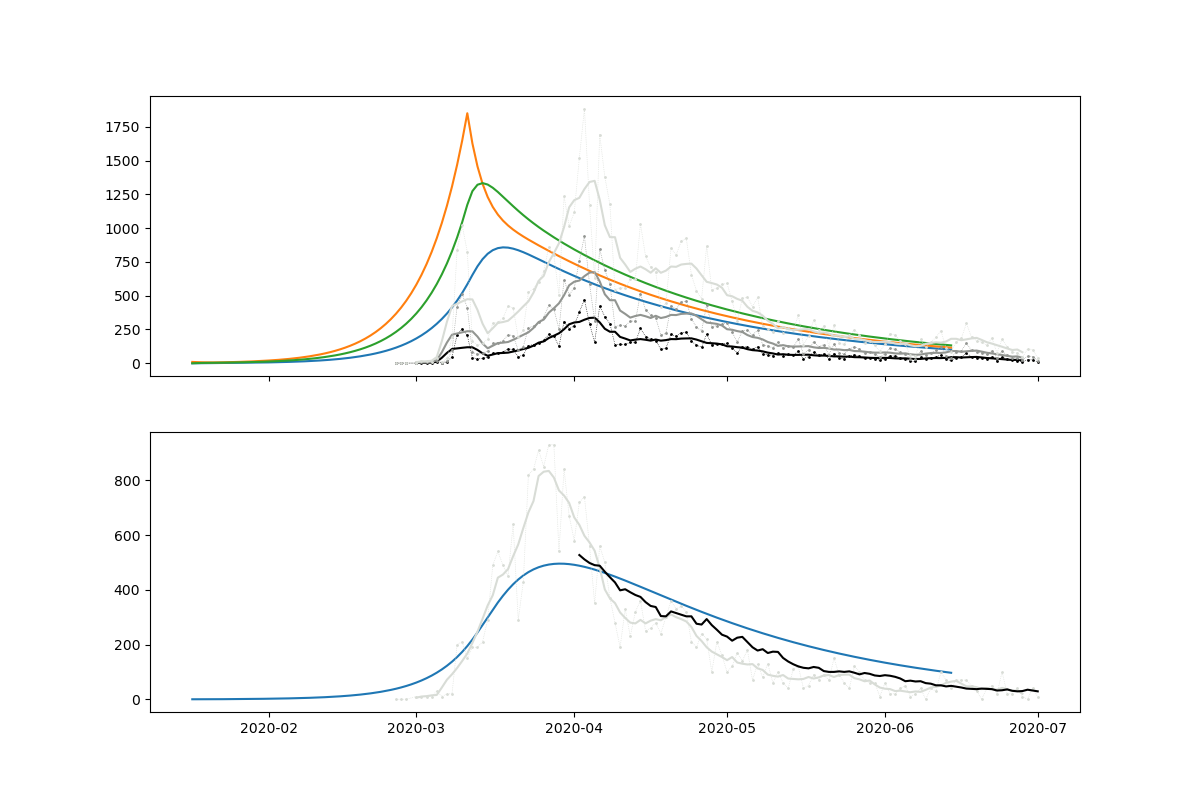

In [499]:

u_H = 1/10
r_chr = 0.25
ts = tRange 
Is = mInf 
k = 0
int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
Hs = np.exp(-u_H*ts) * (r_chr*nu*int_I + k) 

# fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True) 
fig,(ax1,ax3) = plt.subplots(2,1,sharex=True) 

ax1.plot(mDays,DKpop*mInf)
ax1.plot(mDays,DKpop*mExp1)
ax1.plot(mDays,DKpop*mExp2)
# ax1.plot(mDays,DKpop*mExp)
pf.plotMean(curDates,curCas,ax1,color='k')
pf.plotMean(curDates,2*curCas,ax1,color='xkcd:grey')
pf.plotMean(curDates,4*curCas,ax1,color='xkcd:light gray')
# pf.plotMean(curDates,4*curCas,ax1,color='k')
# ax2.plot(mDays,DKpop*mInf)
# ax2.plot(mDays,DKpop*mExp1)
# ax2.plot(mDays,DKpop*mExp2)
# ax2.plot(mDays,DKpop*mExp)
# ax3.plot(mDays,(Hs/np.max(Hs)))
# pf.plotMean(curDates,curAdm/np.max(curAdm),ax3,color='k')

ax3.plot(mDays,DKpop*Hs)
pf.plotMean(curDates,curAdm/u_H,ax3,color='xkcd:light gray')
ax3.plot(curAdmBelDays,curAdmBel,color='k')

# ax2.set_ylim([0,1.2*np.max(curAdm)])

In [500]:

# pf.plotMean(curDates,curAdm,ax3,color='k')
# ax3.plot(admDays,admCount)

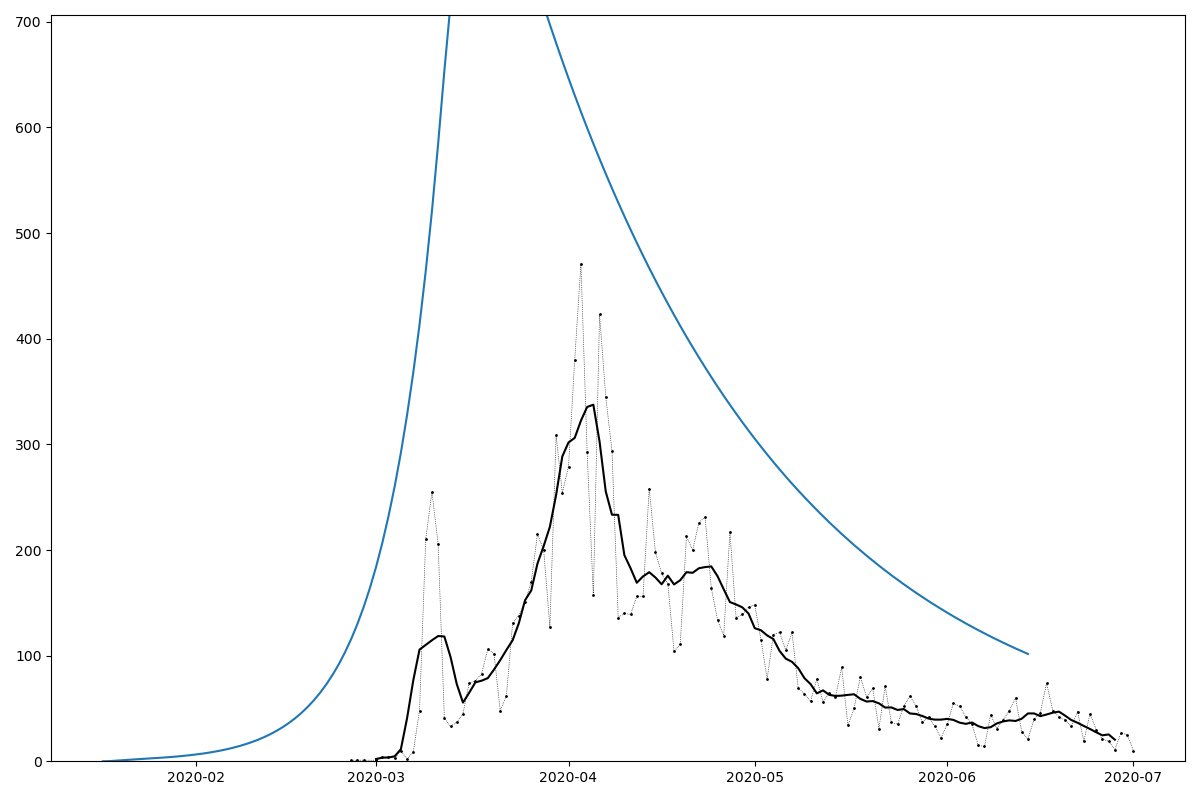

In [501]:
fig,ax1 = plt.subplots()
# ax1.plot(sch1.result.t,DKpop*sch1.result.I)

ax1.plot(mDays,DKpop*mInf)

pf.plotMean(curDates,curCas,ax1,color='k')

ax1.set_ylim([0,1.5*np.max(curCas)])
plt.tight_layout()

(0.0, 111.6)

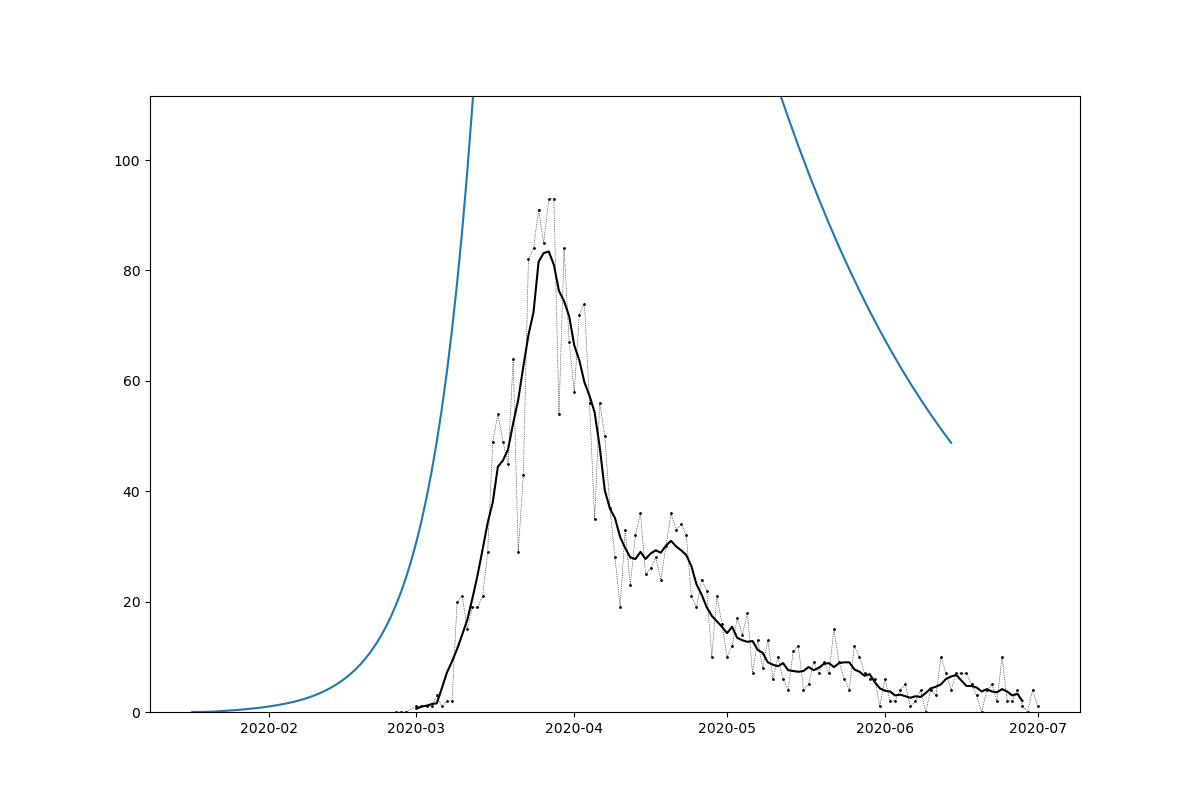

In [502]:

u_H = 1/10
r_chr = 0.009
ts = tRange 
Is = mInf 
k = 0
int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
Hs = np.exp(-u_H*ts) * (r_chr*gamma*int_I + k) 

fig,ax2 = plt.subplots() 
# ax2.plot(mDays,DKpop*Hs)
ax2.plot(mDays,DKpop*Hs/u_H)
pf.plotMean(curDates,curAdm,ax2,color='k')

ax2.set_ylim([0,1.2*np.max(curAdm)])